<div align=center style="font-weight:900;">Examen Introducción a la Programación para Ciencia de Datos</div>
<div align=center> Extraordinario (2023/2024)</div>
<br>
<div align=justify>Nota: No se puede utilizar ciclos explícitos (for/while/repeat) en ningún ejercicio. De hacerlo se
anulará el ejercicio correspondiente. El examen se resuelve en papel. Adjunto a este examen
dispone de una cheat sheet con las funciones más utilizadas en R.</div>

In [1]:
# install.packages("tidyverse")
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### **Ejercicio1**
Dado un data frame df con columnas: receta (tipo character), ingrediente (tipo
character), cantidad (tipo numeric), unidad (tipo character) y es_liquido (tipo logical) se pide
que, usando funciones del paquete tidyverse:

In [2]:


# Fijar semilla para reproducibilidad
set.seed(42)

# Lista de 40 posibles platos (recetas)
recetas <- c("Pizza", "Ensalada", "Sopa", "Tarta", "Pasta", "Tacos", "Hamburguesa", "Sushi", "Paella", "Tortilla",
             "Croquetas", "Risotto", "Pollo al horno", "Enchiladas", "Ceviche", "Salmón a la parrilla", "Arroz con pollo", 
             "Fajitas", "Goulash", "Curry de pollo", "Tortilla española", "Burgers", "Spaghetti carbonara", "Lasaña", 
             "Guiso de lentejas", "Pasta Alfredo", "Falafel", "Sopa de verduras", "Chili con carne", "Pizza Margarita", 
             "Ramen", "Hummus", "Bocadillo de jamón", "Sushi roll", "Moussaka", "Tartaleta de frutas", "Patatas bravas", 
             "Tarta de chocolate", "Tacos al pastor", "Pollo a la parrilla", "Pisto manchego")

# Lista de ingredientes comunes
ingredientes <- c("Harina", "Tomate", "Aceite", "Leche", "Pollo", "Pescado", "Lechuga", "Arroz", "Sal", "Ajo", "Cebolla", 
                  "Huevo", "Pimiento", "Queso", "Pepino", "Camarón", "Aguacate", "Albahaca", "Manteca", "Tortillas", 
                  "Salsa de soja", "Guisante", "Bacon", "Chili", "Mostaza", "Papas", "Zanahoria", "Espinacas", "Jamon", 
                  "Berenjena", "Pechuga de pollo", "Pimienta", "Curry", "Tomate seco", "Mozzarella", "Ramen", "Jengibre", 
                  "Cebollín", "Almejas", "Tamarindo", "Pistacho", "Pepitas")

# Generar el data frame con 100 muestras y 40 platos
df <- tibble(
  receta = sample(recetas, size = 100, replace = TRUE),  # Selección aleatoria de 100 recetas de las 40 disponibles
  ingrediente = sample(ingredientes, size = 100, replace = TRUE),  # Selección aleatoria de 100 ingredientes de los 40 posibles
  cantidad = round(runif(100, 1, 500), 1),  # Cantidad aleatoria entre 1 y 500
  unidad = sample(c("g", "ml", "cucharadas", "tazas", "gramos", "l"), size = 100, replace = TRUE),  # Unidades de medida aleatorias
  es_liquido = sample(c(TRUE, FALSE), size = 100, replace = TRUE)  # Aleatorio entre ingredientes líquidos y no líquidos
)

# Ver los primeros datos
head(df)

receta,ingrediente,cantidad,unidad,es_liquido
<chr>,<chr>,<dbl>,<chr>,<lgl>
Patatas bravas,Pepitas,80.3,gramos,TRUE
Pizza,Pepitas,160.7,tazas,TRUE
Guiso de lentejas,Curry,154.2,cucharadas,FALSE
Tortilla,Jamon,54.8,ml,TRUE
Tartaleta de frutas,Mostaza,489.7,g,TRUE
Fajitas,Pimienta,249.0,cucharadas,TRUE


1. Calcule la cantidad total de ingredientes líquidos (supondremos que todos usan la misma
unidad) por receta, pero sólo de aquellas recetas que tengan un mínimo de 5 ingredientes
(sean líquidos o no).


In [3]:
df %>%
  group_by(receta) %>%
  summarise(
            n_in = n(),
            n_liq = sum(es_liquido)) %>%
  filter(n_in >= 5)

receta,n_in,n_liq
<chr>,<int>,<int>
Fajitas,5,5
Pasta,6,3
Tartaleta de frutas,7,1


2. Muestre el nombre de las 5 recetas que utilizan más ingredientes (en número, no en
cantidad) que la media.

In [4]:
(df %>%
  group_by(receta) %>%
  summarise(n_in = n()) %>%
  filter(n_in > mean(n_in)) %>%
  arrange(desc(n_in)) %>%
  head(5))$receta

[1] "Tartaleta de frutas" "Pasta"               "Fajitas"            
[4] "Chili con carne"     "Lasaña"

### **Ejercicio2**
Dado el mismo data frame df de antes, realice un diagrama de barras que muestre
la cantidad de recetas en donde aparece cada ingredientes. Coloree de manera diferente los
ingredientes líquidos de aquellos que no los son y dibuje una línea horizontal que marque el
valor medio de recetas por ingrediente.

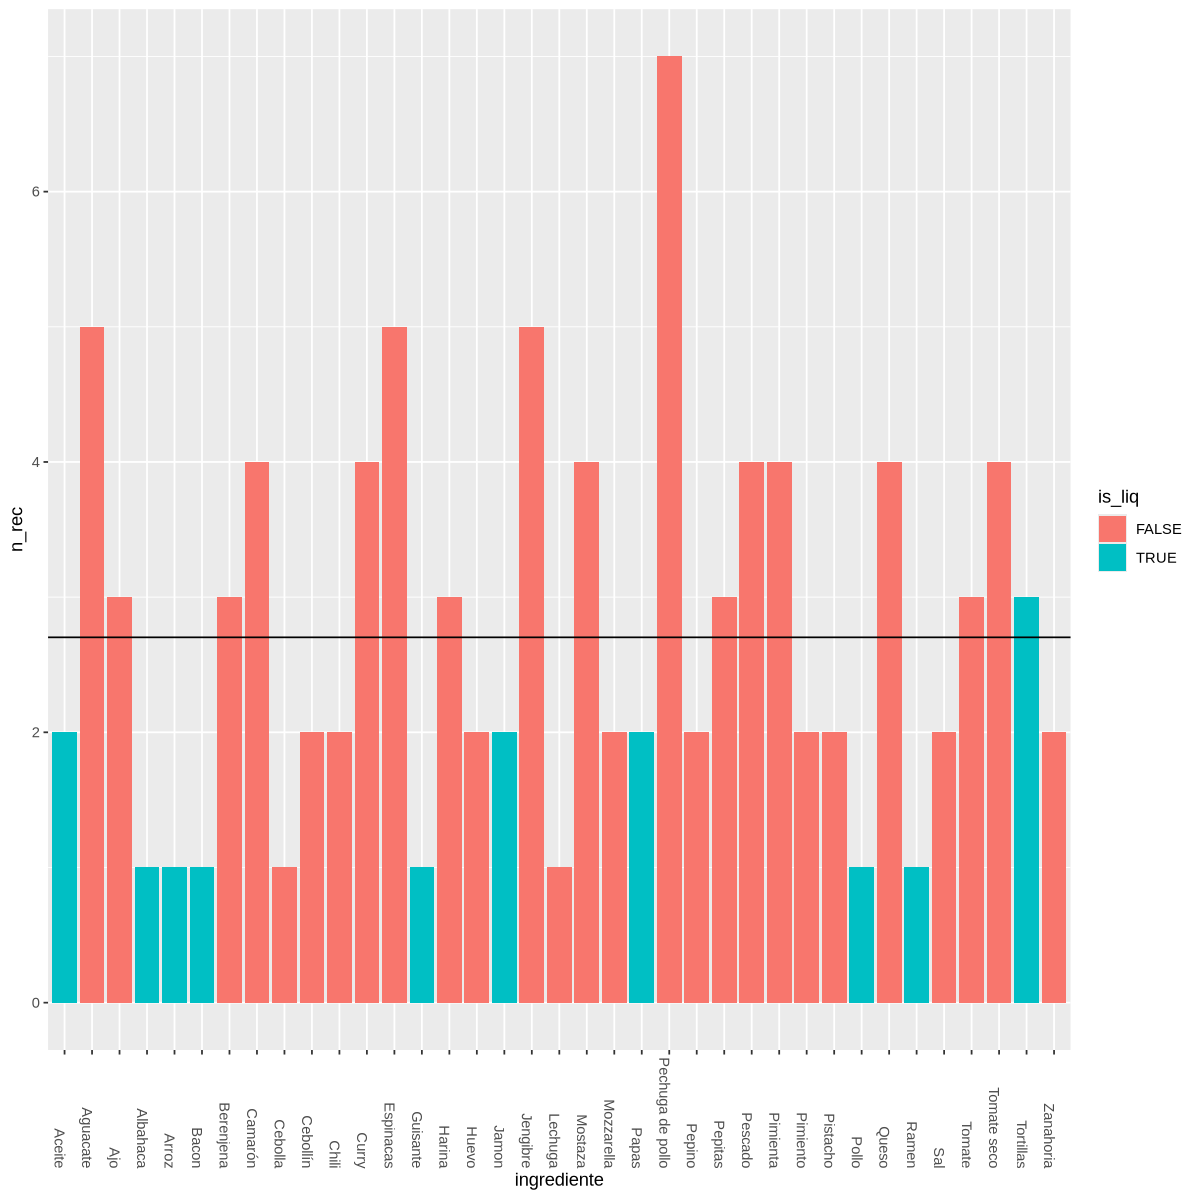

In [5]:
df_ <- df %>%
  group_by(ingrediente) %>%
  summarise(n_rec = n(), is_liq = all(es_liquido))


options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(df_, aes(x = ingrediente, y = n_rec, fill = is_liq))+
  geom_col()+
  geom_hline(yintercept = mean(df_$n_rec))+
  theme(axis.text.x = element_text(angle = -90, hjust = 1))

Al haber creado el dataset de manera aleatoria, la variable es_liquido no tiene sentido, es decir, no se ha asignado de manera lógica

### **Ejercicio3**
Agregue al data frame df de antes una nueva columna llamada factor_cantidad que
sea de tipo factor ordenado con niveles (poco < normal < mucho) donde poco está en el
rango [0,15), normal está en el rango [15,100) y alto está en el rango (100,500]. Esta columna
debe representar los mismos datos que la columna cantidad pero en los tres grupos
disjuntos.

<br>
<br>
<br>
Regenero el ds para la segunda parte de este ejercicio

In [6]:

# Fijar semilla para reproducibilidad
set.seed(42)

# Lista de 40 posibles platos (recetas)
recetas <- c("Pizza", "Ensalada", "Sopa", "Tarta", "Pasta", "Tacos", "Hamburguesa", "Sushi", "Paella", "Tortilla",
             "Croquetas", "Risotto", "Pollo al horno", "Enchiladas", "Ceviche", "Salmón a la parrilla", "Arroz con pollo", 
             "Fajitas", "Goulash", "Curry de pollo", "Tortilla española", "Burgers", "Spaghetti carbonara", "Lasaña", 
             "Guiso de lentejas", "Pasta Alfredo", "Falafel", "Sopa de verduras", "Chili con carne", "Pizza Margarita", 
             "Ramen", "Hummus", "Bocadillo de jamón", "Sushi roll", "Moussaka", "Tartaleta de frutas", "Patatas bravas", 
             "Tarta de chocolate", "Tacos al pastor", "Pollo a la parrilla", "Pisto manchego")

# Lista de ingredientes comunes
ingredientes <- c("Harina", "Tomate", "Aceite", "Leche", "Pollo", "Pescado", "Lechuga", "Arroz", "Sal", "Ajo", "Cebolla", 
                  "Huevo", "Pimiento", "Queso", "Pepino", "Camarón", "Aguacate", "Albahaca", "Manteca", "Tortillas", 
                  "Salsa de soja", "Guisante", "Bacon", "Chili", "Mostaza", "Papas", "Zanahoria", "Espinacas", "Jamon", 
                  "Berenjena", "Pechuga de pollo", "Pimienta", "Curry", "Tomate seco", "Mozzarella", "Ramen", "Jengibre", 
                  "Cebollín", "Almejas", "Tamarindo", "Pistacho", "Pepitas")

# Generar el data frame con 100 muestras y 40 platos
df <- tibble(
  receta = sample(recetas, size = 100, replace = TRUE),  # Selección aleatoria de 100 recetas de las 40 disponibles
  ingrediente = sample(ingredientes, size = 100, replace = TRUE),  # Selección aleatoria de 100 ingredientes de los 40 posibles
  cantidad = round(runif(100, 1, 100), 1),  # Cantidad aleatoria entre 1 y 500
  unidad = sample(c("g", "ml", "cucharadas", "tazas", "gramos", "l"), size = 100, replace = TRUE),  # Unidades de medida aleatorias
  es_liquido = sample(c(TRUE, FALSE), size = 100, replace = TRUE)  # Aleatorio entre ingredientes líquidos y no líquidos
)

# Ver los primeros datos
head(df)

receta,ingrediente,cantidad,unidad,es_liquido
<chr>,<chr>,<dbl>,<chr>,<lgl>
Patatas bravas,Pepitas,16.7,gramos,TRUE
Pizza,Pepitas,32.7,tazas,TRUE
Guiso de lentejas,Curry,31.4,cucharadas,FALSE
Tortilla,Jamon,11.7,ml,TRUE
Tartaleta de frutas,Mostaza,98.0,g,TRUE
Fajitas,Pimienta,50.2,cucharadas,TRUE


In [7]:
(df_ <- df %>%
  mutate(factor_cantidad = cut(
    cantidad,
    breaks = c(-1, 15, 100, 501),
    labels = c("poco", "normal", "mucho"),
    orered = TRUE
  ))) %>% head()

receta,ingrediente,cantidad,unidad,es_liquido,factor_cantidad
<chr>,<chr>,<dbl>,<chr>,<lgl>,<fct>
Patatas bravas,Pepitas,16.7,gramos,TRUE,normal
Pizza,Pepitas,32.7,tazas,TRUE,normal
Guiso de lentejas,Curry,31.4,cucharadas,FALSE,normal
Tortilla,Jamon,11.7,ml,TRUE,poco
Tartaleta de frutas,Mostaza,98.0,g,TRUE,normal
Fajitas,Pimienta,50.2,cucharadas,TRUE,normal


Utilice esta nueva columna para escribir en un fichero “salida.csv” (separado por
comas) aquellas recetas con todos sus ingredientes en cantidad normal.

In [8]:
(rec <- df_ %>%
   group_by(receta) %>%
   summarise(allNrml = all(factor_cantidad == "normal")) %>%
   filter(allNrml == TRUE) %>%
   pull(receta))

write(rec, "salida.csv", sep=", ", ncolumns = length(rec))

[1] "Arroz con pollo"     "Bocadillo de jamón"  "Ceviche"            
 [4] "Curry de pollo"      "Enchiladas"          "Ensalada"           
 [7] "Falafel"             "Goulash"             "Hamburguesa"        
[10] "Hummus"              "Moussaka"            "Paella"             
[13] "Pasta Alfredo"       "Patatas bravas"      "Pisto manchego"     
[16] "Pizza Margarita"     "Ramen"               "Risotto"            
[19] "Sopa"                "Spaghetti carbonara" "Sushi"              
[22] "Sushi roll"          "Tartaleta de frutas" "Tortilla española"

### **Ejercicio4**
Escriba una función que dada una matriz m de tipo character (teniendo valor por
omisión una matriz de 2x2 rellena de “hola”) retorne una lista de vectores tipo character que
contenga tantos componentes como filas tenga la matriz. Cada componente debe contener
los elementos en la fila correspondiente en la matriz, pero tantas veces como caracteres ‘a’
contenga. En caso que en una fila no haya ninguna ‘a’ entonces el componente de la lista
debe quedar vacío. Ejemplo:
<br>
<br>
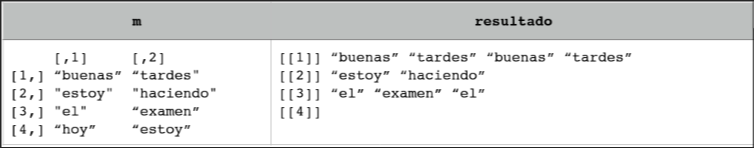

[1] "integer"

In [27]:
(m <- matrix(c("Pizza", "Ensalada", "Sopa", "Tarta", "Pasta", "Tacos", "Hamburguesa", "Sushi", "Paella", "Tortilla"), nrow = 5, ncol=2))
apply(m, 1, \(x) rep(x, sum(str_count(x, "[a]"))) )

Pizza,Tacos
Ensalada,Hamburguesa
Sopa,Sushi
Tarta,Paella
Pasta,Tortilla


[[1]]
[1] "Pizza" "Tacos" "Pizza" "Tacos"

[[2]]
 [1] "Ensalada"    "Hamburguesa" "Ensalada"    "Hamburguesa" "Ensalada"   
 [6] "Hamburguesa" "Ensalada"    "Hamburguesa" "Ensalada"    "Hamburguesa"

[[3]]
[1] "Sopa"  "Sushi"

[[4]]
[1] "Tarta"  "Paella" "Tarta"  "Paella" "Tarta"  "Paella" "Tarta"  "Paella"

[[5]]
[1] "Pasta"    "Tortilla" "Pasta"    "Tortilla" "Pasta"    "Tortilla"

In [40]:
(m <- matrix(c("Pizza", "Ensalada", "Sopa", "Tarta", "Pasta", "Tacos", "Hamburguesa", "Sushi", "Paella", "Tortilla"), nrow = 5, ncol=2))
(v <- apply(m, 1, \(x) list(x)))
lapply(v, \(x) unlist(rep(x, sum(str_count(unlist(x),"a")))) )

Pizza,Tacos
Ensalada,Hamburguesa
Sopa,Sushi
Tarta,Paella
Pasta,Tortilla


[[1]]
[[1]][[1]]
[1] "Pizza" "Tacos"


[[2]]
[[2]][[1]]
[1] "Ensalada"    "Hamburguesa"


[[3]]
[[3]][[1]]
[1] "Sopa"  "Sushi"


[[4]]
[[4]][[1]]
[1] "Tarta"  "Paella"


[[5]]
[[5]][[1]]
[1] "Pasta"    "Tortilla"

[[1]]
[1] "Pizza" "Tacos" "Pizza" "Tacos"

[[2]]
 [1] "Ensalada"    "Hamburguesa" "Ensalada"    "Hamburguesa" "Ensalada"   
 [6] "Hamburguesa" "Ensalada"    "Hamburguesa" "Ensalada"    "Hamburguesa"

[[3]]
[1] "Sopa"  "Sushi"

[[4]]
[1] "Tarta"  "Paella" "Tarta"  "Paella" "Tarta"  "Paella" "Tarta"  "Paella"

[[5]]
[1] "Pasta"    "Tortilla" "Pasta"    "Tortilla" "Pasta"    "Tortilla"